In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.9 MB/s eta 0:00:00
 

In [3]:
import pycaret
pycaret.__version__

'3.0.0'

In [4]:
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# set up
from pycaret.classification import * 
# from pycaret.classification import * : import all the classification algorithms and functions available in the PyCaret library

s = setup(data, target = 'Class variable', session_id = 1)

,Description,Value
0,Session id,1
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7915,0.8329,0.6263,0.7394,0.6754,0.5240,0.5298,0.6860
ridge,Ridge Classifier,0.7804,0.0000,0.5842,0.7283,0.6439,0.4899,0.4985,0.0540
lda,Linear Discriminant Analysis,0.7804,0.8395,0.5947,0.7235,0.6490,0.4930,0.5001,0.0700
lr,Logistic Regression,0.7730,0.8384,0.5789,0.7130,0.6358,0.4749,0.4821,0.4440
nb,Naive Bayes,0.7730,0.8219,0.6471,0.6904,0.6654,0.4942,0.4968,0.0650
et,Extra Trees Classifier,0.7694,0.8345,0.5798,0.7062,0.6325,0.4684,0.4759,0.6580
gbc,Gradient Boosting Classifier,0.7581,0.8248,0.5678,0.6845,0.6175,0.4439,0.4501,0.3070
ada,Ada Boost Classifier,0.7561,0.8195,0.6152,0.6612,0.6352,0.4530,0.4552,0.2640
knn,K Neighbors Classifier,0.7543,0.7805,0.5573,0.6839,0.6086,0.4344,0.4419,0.0730
xgboost,Extreme Gradient Boosting,0.7507,0.8044,0.6012,0.6581,0.6199,0.4377,0.4437,0.1740


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## 모형 평가
- matplotlib, seaborn, plotly 시각화 라이브러리 활용해서 별도로 시각화 작업
- pycaret 자체적으로 시각화 함수 제공

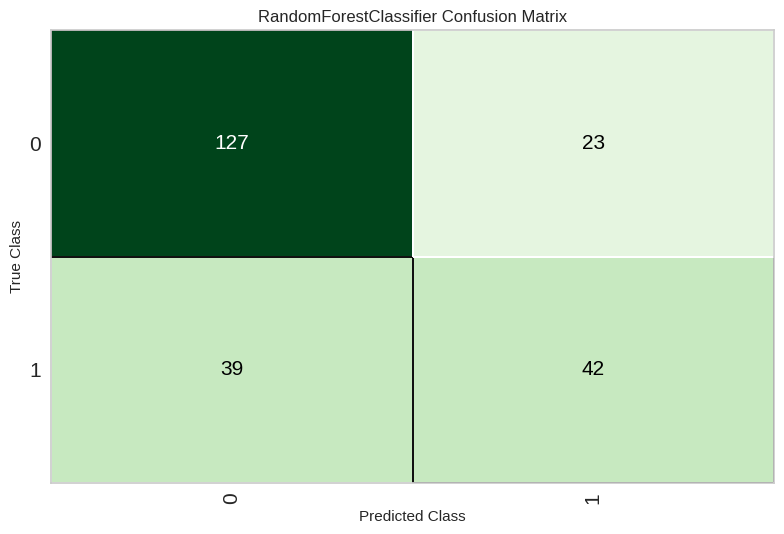

In [7]:
# plot_confusion matrix
plot_model(best, plot = 'confusion_matrix')

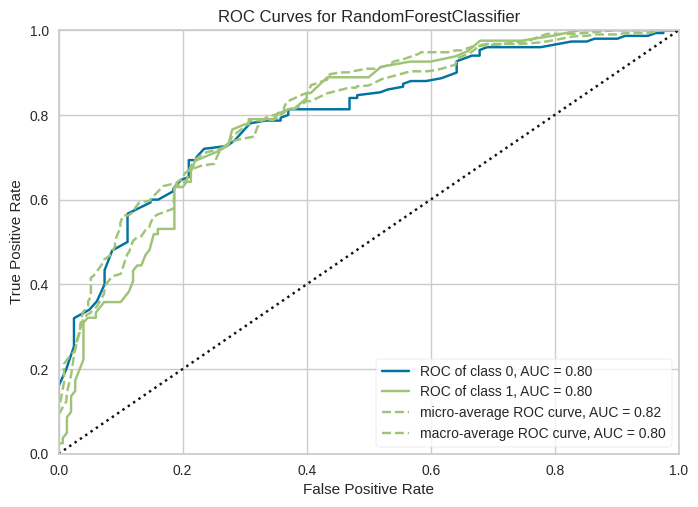

In [8]:
plot_model(best, plot='auc')

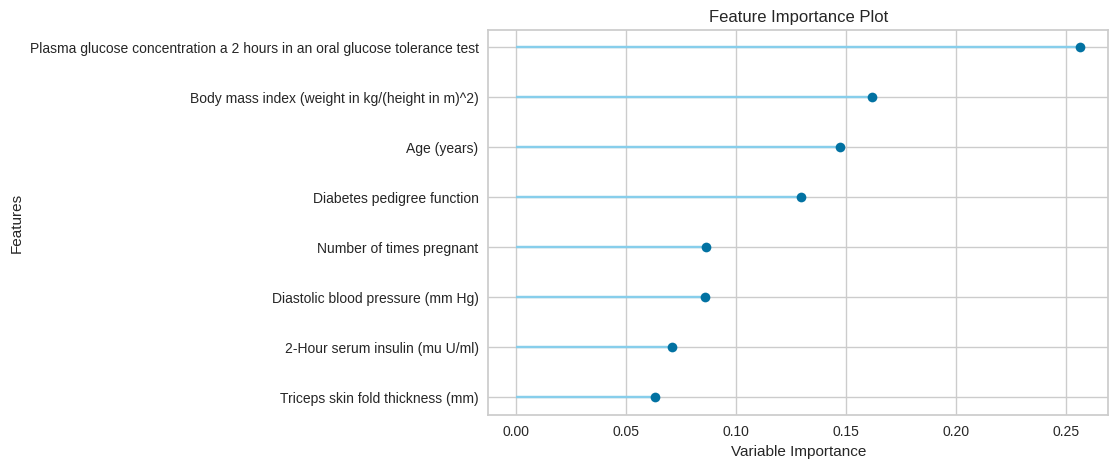

In [9]:
plot_model(best, plot='feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

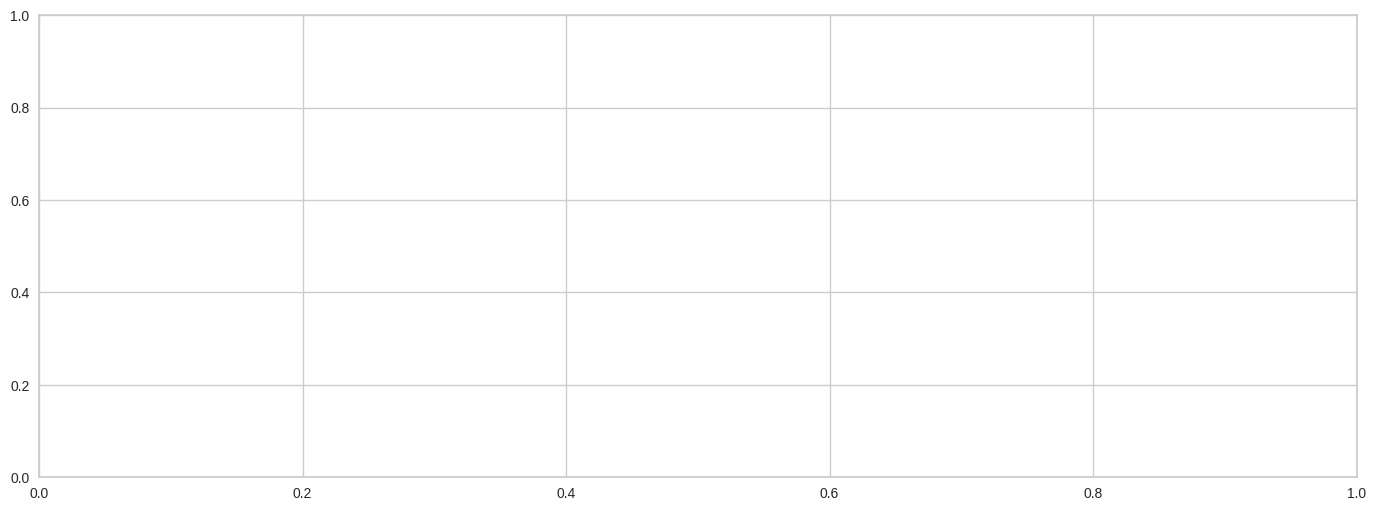

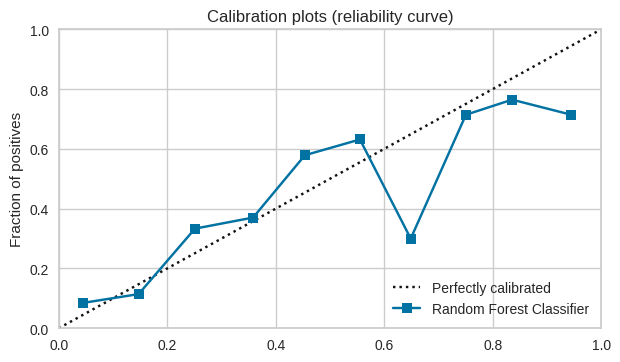

In [11]:
# jupyter notebook 에서 실행
# ipywidget 이 필요
evaluate_model(best)

## 예측

In [12]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7316,0.7982,0.5185,0.6462,0.5753,0.3826,0.3875


In [13]:
holdout_pred.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
397,0,131,66,40,0,34.299999,0.196,22,1,0,0.92
247,0,165,90,33,680,52.299999,0.427,23,0,1,0.64
161,7,102,74,40,105,37.200001,0.204,45,0,0,0.68
585,1,93,56,11,0,22.500000,0.417,22,0,0,0.97
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.72


In [16]:
new_df = data.copy()
new_df = new_df.drop('Class variable', axis = 1)
new_df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
predictions = predict_model(best, data = new_df)
predictions.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,0.93
1,1,85,66,29,0,26.600000,0.351,31,0,0.94
2,8,183,64,0,0,23.299999,0.672,32,1,0.85
3,1,89,66,23,94,28.100000,0.167,21,0,1.00
4,0,137,40,35,168,43.099998,2.288,33,1,0.84


## 모형 저장

In [18]:
save_model(best, "my_1st_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diab...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_we

In [19]:
my_model = load_model('my_1st_model')
my_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weight in '
                                             'kg/(height in m)^2)',
                                             'Diab...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=False))],
         verbose=False)